In [383]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import datetime


df = pd.read_csv('/content/0d3d86e553f8fde1accd5808cb386d0cd38e2d8e950b368819cddb91.csv')

In [384]:
df.head()

,ID,Date,Element,Data_Value
0,BR00E3-0520,2010-12-09,TMAX,310
1,BR00E3-0520,2011-02-09,TMIN,215
2,BR00E3-0520,2006-09-09,TMIN,150
3,BR00E3-0520,2008-05-05,TMIN,125
4,BR00E3-0520,2009-11-30,TMIN,217


In [385]:

#tranformando a variavel date em dateTime e ordenando
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by = 'Date')
#transformando a temperatura em celcius 
df['Data_Value'] = df['Data_Value']/10

In [386]:
#criando as colunas year, month e day apartir da coluna Date
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

#excluindo os anos bissextos 
df= df[~(((df['month']) ==2) & (df['day'] == 29))]

In [387]:
df

,ID,Date,Element,Data_Value,year,month,day
1135,BR00E3-0520,2005-01-01,TMAX,30.9,2005,1,1
728,BR00E3-0520,2005-01-04,TMAX,29.3,2005,1,4
492,BR00E3-0520,2005-01-05,TMIN,19.6,2005,1,5
495,BR00E3-0520,2005-01-05,TMAX,24.4,2005,1,5
640,BR00E3-0520,2005-01-06,TMIN,21.5,2005,1,6
...,...,...,...,...,...,...,...
1781,BR00E3-0520,2015-12-26,TMAX,29.6,2015,12,26
225,BR00E3-0520,2015-12-27,TMAX,29.3,2015,12,27
86,BR00E3-0520,2015-12-27,TMIN,20.8,2015,12,27
2482,BR00E3-0520,2015-12-29,TMIN,20.9,2015,12,29


In [388]:
#fazendo um filtro para pegar os dados do ano de 2015 
filtro = pd.date_range(start = '2015-01-01', end = '2015-12-31')
#usando .isin para aplicar nosso filtro que vai retornar somente os dados de 2015
tem2015 = df[df['Date'].isin(filtro)].set_index('Date')[['Element', 'Data_Value']]


In [389]:
#renomeando todos os anos do nosso dataframe para 2015
df = df.set_index('Date')
nova_data = []
for date in df.index:
  date = date.replace(year = 2015)
  nova_data.append(date)

df.index = nova_data

In [390]:
#criando as variaveis temperatura maxima e minima de 2005 a 2014 e de 2015
tem_max = df[df['Element'] == 'TMAX']
tem_max = tem_max.groupby([tem_max.index])['Data_Value'].max()
tem_min= df[df['Element'] == 'TMIN']
tem_min = tem_min.groupby([tem_min.index])['Data_Value'].min()

tem_max2015 = tem2015[tem2015['Element'] == 'TMAX']
tem_max2015 = tem_max2015.groupby([tem_max2015.index])['Data_Value'].max()
tem_min2015 = tem2015[tem2015['Element'] == 'TMIN']
tem_min2015 = tem_min2015.groupby([tem_min2015.index])['Data_Value'].min()

In [391]:
#detectando quais recordes de temperatura foram quebrados em 2015 
#usando zip para pegar o indice e o valor e ai comparar com as variaveis temperatura maxima ou minima 
for i,valor in zip(tem_max2015.index, tem_max2015):
    if valor < tem_max.loc[i]:
        tem_max2015.drop(i, axis = 0, inplace = True)
        
for i,valor in zip(tem_min2015.index, tem_min2015):
    if valor > tem_min.loc[i]:
        tem_min2015.drop(i, axis = 0, inplace = True)

In [392]:
#o conjunto de dados de são paulo possuia 6 linhas a menos em temperatura maxima
#escolhi remover 6 valores aleatorios em temperatura minima para igualar os dados
#poderia ter tomado outras alternativas melhores provavelmente. 
remove_n = 6
drop_indices = np.random.choice(tem_min.index, remove_n, replace=False)
tem_min = tem_min.drop(drop_indices)


# plotagem

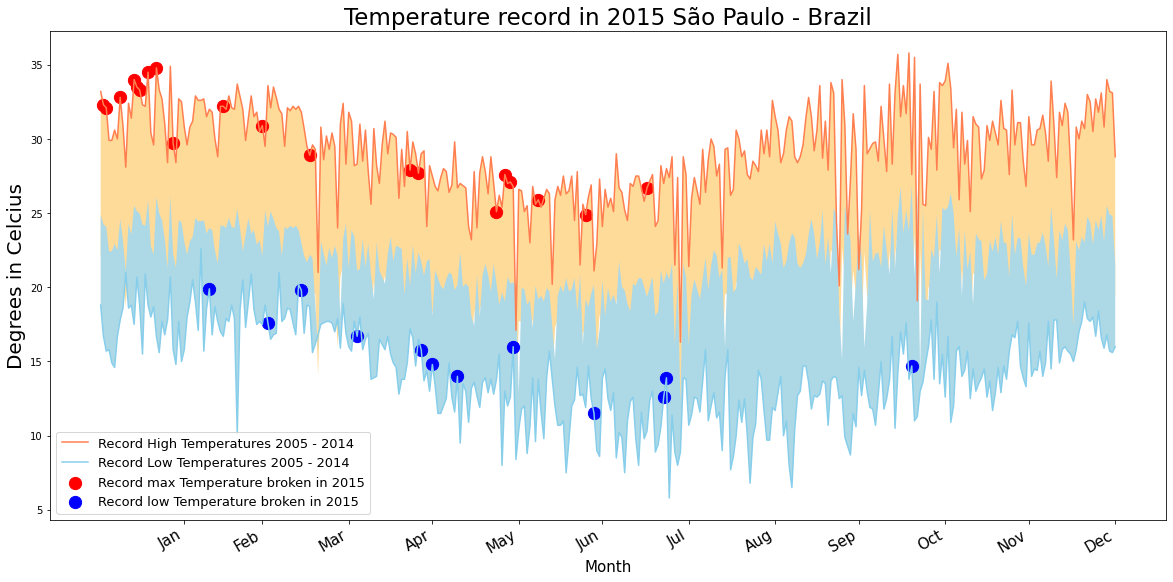

In [393]:


fig, ax = plt.subplots()

#plotando as linhas de maxima temperatura e minima
tem_max.plot(figsize = (20, 10),color = 'coral',linestyle = '-', label = 'Record High Temperatures 2005 - 2014')
tem_min.plot(color = 'skyblue',linestyle = '-',  label = 'Record Low Temperatures 2005 - 2014')

#preenchendo o espaço entre as duas linhas. 
plt.gca().fill_between(tem_max.index, tem_max, tem_max /1.5,facecolor=('orange'), alpha=0.4)
plt.gca().fill_between(tem_min.index, tem_min,  tem_max *0.75 ,facecolor=('lightblue'), alpha=1)

#plotando os pontos onde o recorde de temperatura foi quebrado em 2015
plt.scatter(x= tem_max2015.index, y = tem_max2015.values, color = 'r', s = 150, label = 'Record max Temperature broken in 2015')
plt.scatter(x = tem_min2015.index, y = tem_min2015.values, color = 'b', s = 150, label = 'Record low Temperature broken in 2015')

#labels, legenda, informações
plt.title('Temperature record in 2015 São Paulo - Brazil', fontsize = 23) 
plt.ylabel('Degrees in Celcius',fontsize = 20)
plt.xlabel('Month',fontsize = 15)
plt.legend(loc = 3,fontsize = 13)

#modificando o xticks 
xticks = (pd.date_range('1/1/2015','31/12/2015', freq = 'M')) 
#pega os meses que possui na variavel xticks
xticks_labels = pd.to_datetime(xticks, format = '%j').strftime('%b')
ax.set_xticks(xticks)
ax.set_xticklabels(xticks_labels,fontsize = 15)

#salvando o grafico em imagem
plt.savefig('solved.png')
